In [1]:
import numpy as np
import pandas as pd

In [2]:
# import external functions
import order_balance_factor as cal

In [3]:
import matplotlib as mat
import matplotlib.pyplot as plt
mat.style.use("ggplot")

In [4]:
# read sample tick data
tick_data = pd.read_csv("tickdata_20221229.csv")

In [5]:
# rename dataframe
names_dict = {'COLUMN01':'index', 'COLUMN02':'stock_code', 'COLUMN03':'tick_time'}

dict_value = [f'selling_price{i}' for i in range(1,11)] + [f'selling_volume{i}' for i in range(1,11)] + [f'buying_price{i}' for i in range(1,11)] + [f'buying_volume{i}' for i in range(1,11)]
dict_key = ['COLUMN08','COLUMN09'] + [f'COLUMN{i}' for i in range(10,48)]
for k,v in zip(dict_key,dict_value):
    names_dict[k] = v
names_dict

{'COLUMN01': 'index',
 'COLUMN02': 'stock_code',
 'COLUMN03': 'tick_time',
 'COLUMN08': 'selling_price1',
 'COLUMN09': 'selling_price2',
 'COLUMN10': 'selling_price3',
 'COLUMN11': 'selling_price4',
 'COLUMN12': 'selling_price5',
 'COLUMN13': 'selling_price6',
 'COLUMN14': 'selling_price7',
 'COLUMN15': 'selling_price8',
 'COLUMN16': 'selling_price9',
 'COLUMN17': 'selling_price10',
 'COLUMN18': 'selling_volume1',
 'COLUMN19': 'selling_volume2',
 'COLUMN20': 'selling_volume3',
 'COLUMN21': 'selling_volume4',
 'COLUMN22': 'selling_volume5',
 'COLUMN23': 'selling_volume6',
 'COLUMN24': 'selling_volume7',
 'COLUMN25': 'selling_volume8',
 'COLUMN26': 'selling_volume9',
 'COLUMN27': 'selling_volume10',
 'COLUMN28': 'buying_price1',
 'COLUMN29': 'buying_price2',
 'COLUMN30': 'buying_price3',
 'COLUMN31': 'buying_price4',
 'COLUMN32': 'buying_price5',
 'COLUMN33': 'buying_price6',
 'COLUMN34': 'buying_price7',
 'COLUMN35': 'buying_price8',
 'COLUMN36': 'buying_price9',
 'COLUMN37': 'buying_pr

In [6]:
tick_data = tick_data.rename(columns = names_dict)
tick_data.head()

,index,stock_code,tick_time,COLUMN04,COLUMN05,COLUMN06,COLUMN07,selling_price1,selling_price2,selling_price3,...,buying_volume9,buying_volume10,COLUMN48,COLUMN49,COLUMN50,COLUMN51,COLUMN52,COLUMN53,COLUMN54,COLUMN55
0,0,600536.SH,93000000,559500,559500,559500,559500,559900,560000,561000,...,600,100,81500,4559925,316600,549020,618200,505800,539980,585700
1,1,002080.SZ,93000000,217600,218300,217600,218100,218300,218500,218600,...,400,3000,23600,513802,126300,266600,238900,195500,213300,227300
2,2,002080.SZ,93000000,217600,218300,217600,218100,218300,218500,218600,...,400,3000,23600,513802,126300,266600,238900,195500,213300,227300
3,3,002081.SZ,93000000,49100,49100,49000,49100,49200,49300,49400,...,13300,22700,25300,124213,595200,1206400,54000,44200,47700,51400
4,4,002081.SZ,93000000,49100,49100,49000,49100,49200,49300,49400,...,13300,22700,25300,124213,595200,1206400,54000,44200,47700,51400


## 1. Test for VOI (Volume Order Imbalance)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [7]:
cal.voi(tick_data)

stock_code  tick_time
000009.SZ   93000000         NaN
            93000000         0.0
            93003000      7826.0
            93006000      5300.0
            93009000     -2500.0
                          ...   
688981.SH   145944000        0.0
            145950000        0.0
            145956000        0.0
            145959000        0.0
            150000000   -41479.0
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

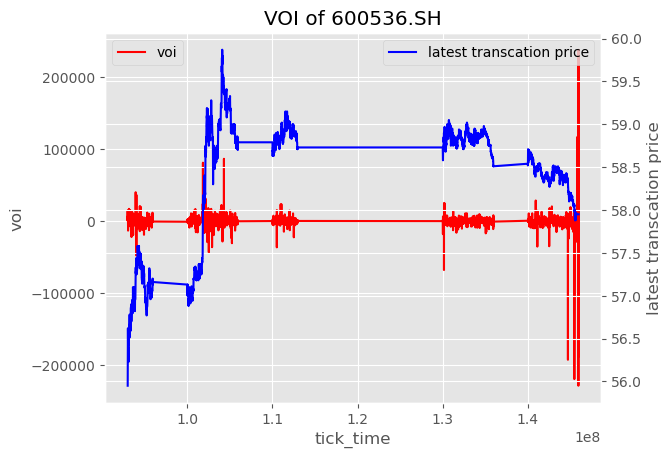

In [8]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
voi_stock = cal.voi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'VOI of {test_stock}')
ax.plot(voi_stock,'r-', label = 'voi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("voi")
ax2.set_ylabel("latest transcation price")


## 2. Test for Weighted VOI (Volume Order Imbalance)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [9]:
cal.w_voi(tick_data)

stock_code  tick_time
000009.SZ   93000000              NaN
            93000000         0.000000
            93003000     22041.509091
            93006000      1745.454545
            93009000      -518.181818
                             ...     
688981.SH   145944000      -78.545455
            145950000     -196.363636
            145956000      -16.363636
            145959000      229.090909
            150000000    -8453.672727
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

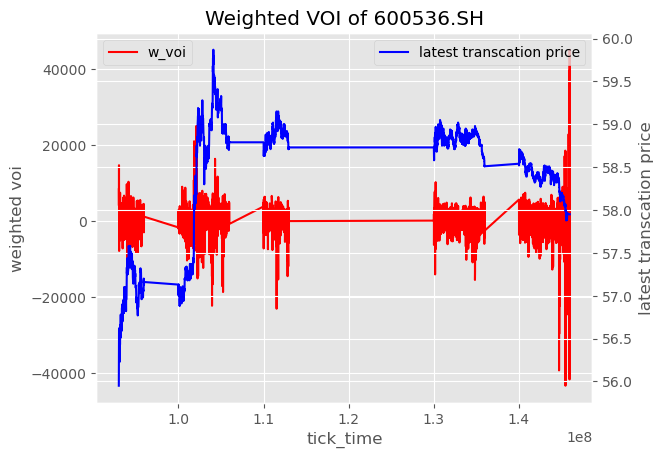

In [10]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
w_voi_stock = cal.w_voi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'Weighted VOI of {test_stock}')
ax.plot(w_voi_stock,'r-', label = 'w_voi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("weighted voi")
ax2.set_ylabel("latest transcation price")


## 3. Test for OFI 

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [11]:
cal.ofi(tick_data)

stock_code  tick_time
000009.SZ   93000000         NaN
            93000000         0.0
            93003000     11026.0
            93006000      5300.0
            93009000     -2500.0
                          ...   
688981.SH   145944000        0.0
            145950000        0.0
            145956000        0.0
            145959000        0.0
            150000000   -29979.0
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

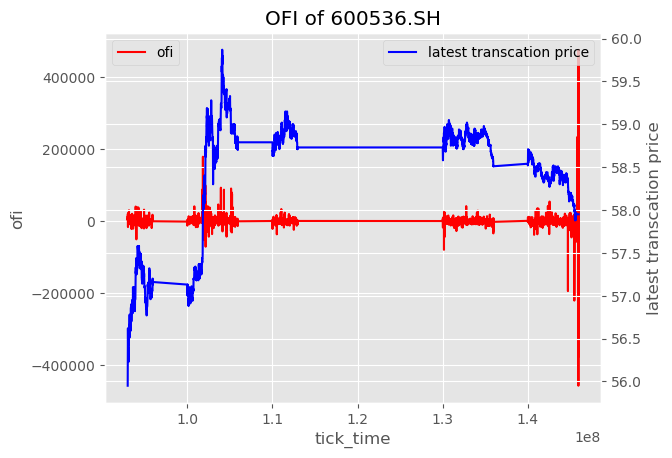

In [12]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
ofi_stock = cal.ofi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'OFI of {test_stock}')
ax.plot(ofi_stock,'r-', label = 'ofi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("ofi")
ax2.set_ylabel("latest transcation price")


## 4. Test for MOFI 

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [13]:
cal.mofi(tick_data)

stock_code  tick_time
000009.SZ   93000000              NaN
            93000000         0.000000
            93003000     30997.872727
            93006000      1745.454545
            93009000      -518.181818
                             ...     
688981.SH   145944000      -78.545455
            145950000     -196.363636
            145956000      -16.363636
            145959000      229.090909
            150000000     1009.418182
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

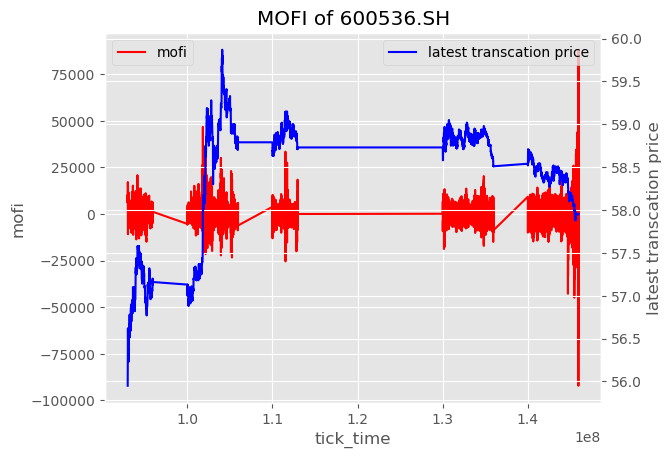

In [14]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
mofi_stock = cal.mofi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'MOFI of {test_stock}')
ax.plot(mofi_stock,'r-', label = 'mofi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("mofi")
ax2.set_ylabel("latest transcation price")


## 5. Test for OIR (Order Imbalance Ratio)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [15]:
cal.oir(tick_data)

stock_code  tick_time
000009.SZ   93000000     0.188116
            93000000     0.188116
            93003000     0.422130
            93006000     0.430693
            93009000     0.411323
                           ...   
688981.SH   145944000    0.174409
            145950000    0.156455
            145956000    0.154916
            145959000    0.161089
            150000000    0.015114
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

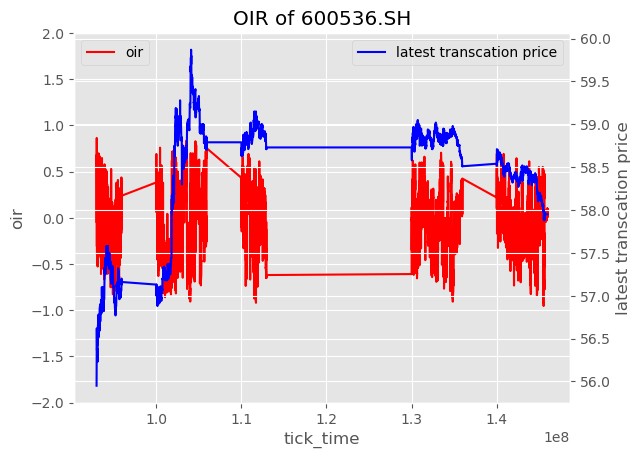

In [16]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
oir_stock = cal.oir(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'OIR of {test_stock}')
ax.plot(oir_stock,'r-', label = 'oir')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.set_ylim(-2, 2)
ax.legend(loc = 2)
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("oir")
ax2.set_ylabel("latest transcation price")


## 6. Test for SOIR (Step Order Imbalance Ratio)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [17]:
cal.soir(tick_data)

stock_code  tick_time
000009.SZ   93000000     0.151662
            93000000     0.151662
            93003000     0.318207
            93006000     0.326195
            93009000     0.312425
                           ...   
688981.SH   145944000         NaN
            145950000         NaN
            145956000         NaN
            145959000         NaN
            150000000   -0.171690
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

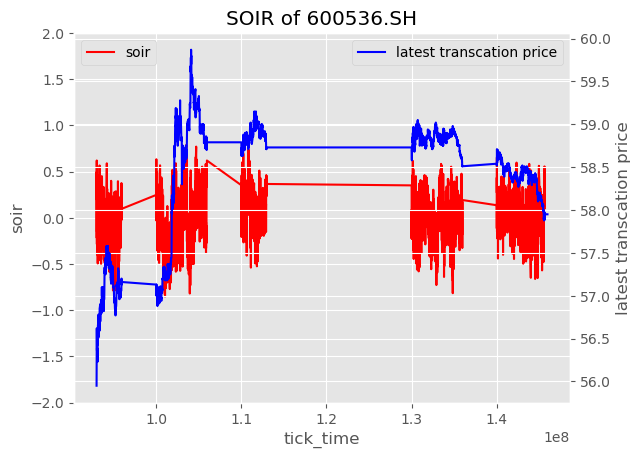

In [18]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
soir_stock = cal.soir(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'SOIR of {test_stock}')
ax.plot(soir_stock,'r-', label = 'soir')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.set_ylim(-2, 2)
ax.legend(loc = 2)
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("soir")
ax2.set_ylabel("latest transcation price")


In [19]:
tick_b = [f'buying_volume{i}' for i in range(1,11)]
tick_b

['buying_volume1',
 'buying_volume2',
 'buying_volume3',
 'buying_volume4',
 'buying_volume5',
 'buying_volume6',
 'buying_volume7',
 'buying_volume8',
 'buying_volume9',
 'buying_volume10']